In [1]:
### This script simulates N-strain dynamics in the coinfection model (le TMT et al. 2021) when there is variation 
### in transmission rates and clearance rates between similar strains in single infection. Below, we simulate the replicator
### dynamics derived for this model on the slow time scale \epsilon t.

import numpy as np
from scipy import integrate
import scipy.integrate  as  ode
import matplotlib.pyplot  as  plt

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [2]:
def repli(b,nu1d): #solve the solution for replicator
    #parameters
    lamd = np.zeros((n,n)) # n: number of strains
    for i in range (0, n):
        for j in range (0, n):
            lamd[i][j] = teth1*(b[i] - b[j]) + teth2*(-nu1d[i] + nu1d[j]) # pairwise invasion fitness
        #replicator system
    def du_dt(u, t = 0):
        return u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))
        
    u, infodict = integrate.odeint(du_dt, u0, t, full_output = True)
    infodict['message']
    s = []
    for i in range(0, n):
        s.append(u.T[i])
    return s

In [3]:
### We define the parameter of the neutral model
n = 10
beta = 4
R0 = 2
k = 1.5
gamm = 1 # set gamma = 1
u0 = np.array([0.15, 0.08, 0.15, 0.18, 0.09, 0.08, 0.12, 0.05, 0.05, 0.05])
t = np.linspace(0, 100, 1000)
    
m = beta/R0 

# computation neutral system variables
S_star = m/beta
T_star = 1 - S_star
I_star = m*T_star/(m + beta*k*T_star)
J_star = T_star - I_star
detP = -I_star*J_star + 2*(T_star)**2
mu = 1/(k*(R0 - 1)) # single to coinfection ratio

teth1 = 2*beta*S_star*(T_star)**2/detP
teth2 = gamm*I_star*(I_star + T_star)/detP

In [4]:
### Set the perturbations values for transmission rates and infection clearance rates
b_per = np.array([1, -0.8, 0.5, -0.5, 0.3, 0.9, 0.2, -2, -0.7, 0])/4 #transmission rates
nu1d_per1 = np.zeros((n,1)) # infection clearance rates
nu1d_per2 = np.array([1, 0.8, -1.5, -0.5, 0.3, -1, 1.2, -2, 0.7, -2])

In [5]:
### CASE 1: ONLY VARIATION IN TRANSMISSION RATES BETA_I
s1 = repli(b_per,nu1d_per1) 
### CASE 2: VARIATIONS IN TRANSMISSION RATES BETA_I AND INFECTION CLEARANCE RATES GAMMA_I
s2 = repli(b_per,nu1d_per2)

labels = []
for i in range(0,n):
    labels.append('strain {}'.format(i+1))

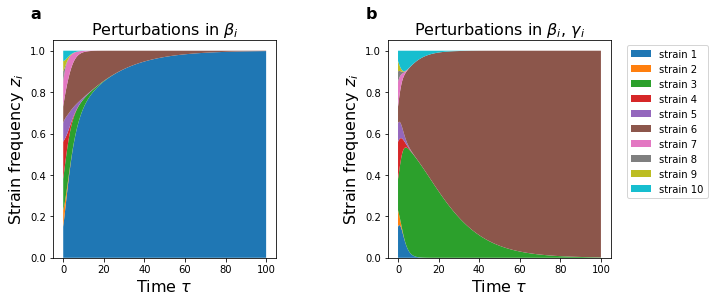

In [6]:
### Plot two cases in the same figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.subplots_adjust(wspace = 0.5)

ax1.stackplot(t, s1, labels = labels)
ax1.set_xlabel("Time $\\tau$", fontsize = 16)
ax1.set_ylabel("Strain frequency $z_i$", fontsize = 16)
ax1.set_title('Perturbations in $\\beta_i$', fontsize = 16)
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, size=16, weight='bold')


ax2.stackplot(t, s2, labels = labels)
ax2.set_xlabel("Time $\\tau$", fontsize = 16)
ax2.set_ylabel("Strain frequency $z_i$", fontsize = 16)
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, size=16, weight='bold')
ax2.set_title('Perturbations in $\\beta_i$, $\\gamma_i$', fontsize = 16)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [7]:
##### Find the strain with biggest basic reproduction ratio
R0 = np.zeros(n)
for i in range (0,n):
    R0[i] = b_per[i]/beta - nu1d_per2[i]/m
    

print ('strain has max R0 is {}'.format(np.argmax(R0) + 1))

strain has max R0 is 10
